In [1]:
# img_directory = '/home/ec2-user/img_align_celeba'
img_directory = '/Users/rwilliams/Desktop/celeba/training'
# celeba_directory = '/home/ec2-user/img_align_celeba'
# img_directory = '/home/ec2-user/autoencoder-vaegan/colbert'
# model_save_path = '/home/ec2-user/vae-colbert.ckpt'
batch_size = 64
training_set_size = 1024
img_size = 128

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import os
from utils import imshow, resize_crop, load_img
%matplotlib inline

In [3]:
# load training data
training = np.array([resize_crop(load_img(i+1, img_directory), (img_size, img_size)) for i in range(training_set_size)])

/Users/rwilliams/anaconda/envs/keras/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


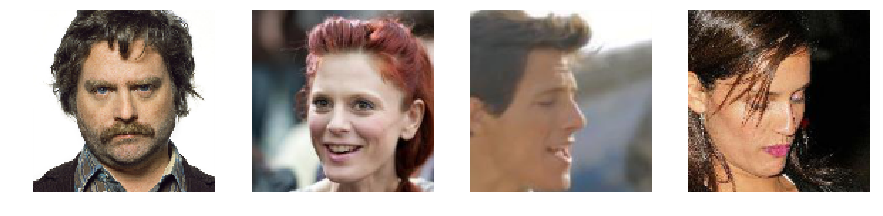

In [4]:
imshow([training[i] for i in range(4)])

# Create model and load weights

In [12]:
import tensorflow as tf
from autoencoder import Autoencoder
tf.reset_default_graph()

vae = Autoencoder(img_shape=(img_size, img_size, 3))

X = tf.placeholder(tf.float32, [None, img_size, img_size, 3])
encoder = vae.encoder(X)
decoder = vae.decoder(encoder)

latent_loss = vae.latent_loss()
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=X, logits=vae.logits)
reconstruction_loss = tf.reduce_mean(xentropy)
loss = reconstruction_loss + latent_loss

optimizer = tf.train.AdamOptimizer(learning_rate=0.0002)
training_op = optimizer.minimize(loss)

saver = tf.train.Saver()

In [13]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
# saver.restore(sess, model_save_path)

In [ ]:
import math
epochs = 10000
batches = int(float(training_set_size) / batch_size) 

for epoch in range(epochs):
    loss_out = np.zeros(batches)
    for batch in range(batches):
        print('.', end='', flush=True)
        feed = training[batch*batch_size:(batch+1)*batch_size]
        _, loss_out[batch] = sess.run([training_op, loss], feed_dict={X: feed})
#     if (epoch % 10 == 0):
#         print('saving session')
#         saver.save(sess, model_save_path)

    print('loss: %s' % np.mean(loss_out))

................loss: 0.678198285401
................loss: 0.676240418106
................loss: 0.675138860941
................loss: 0.672607522458
................loss: 0.661919862032
................loss: 0.65434589982
................loss: 0.644591666758
................loss: 0.640586033463
................loss: 0.639128409326
................loss: 0.63720099628
................loss: 0.636568620801
................

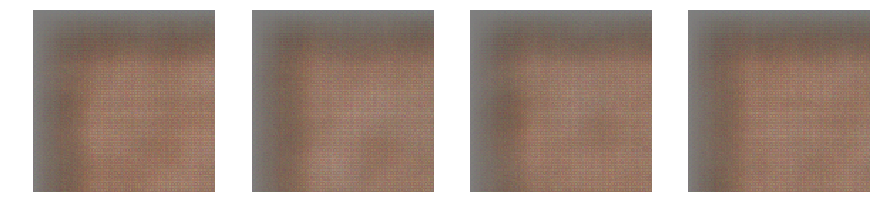

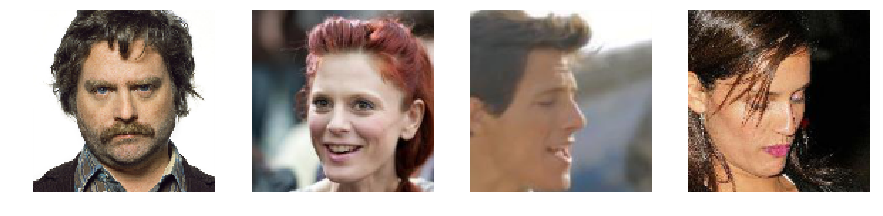

In [19]:
idx = 0
y = sess.run(decoder, feed_dict={X: training[idx:idx+4]})
y.shape
imshow(y[0:4])
imshow(training[idx:idx+4])

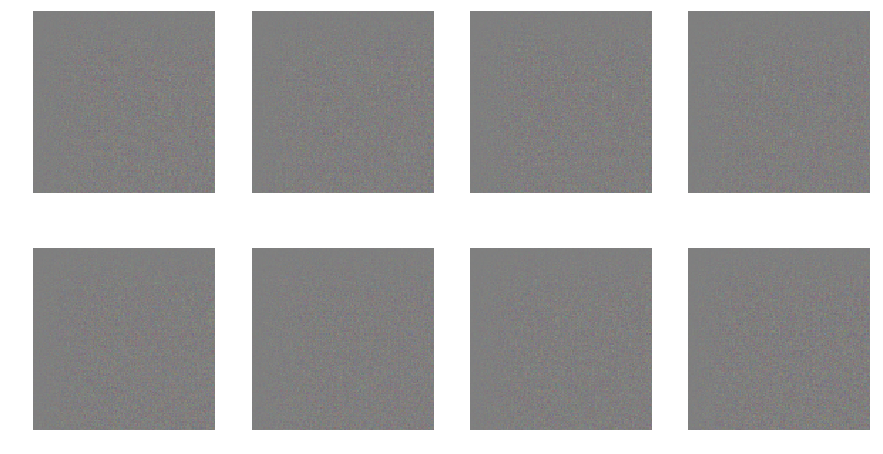

In [7]:
r = np.random.normal(size=(8,128), scale=1.0)
y = sess.run(decoder, feed_dict={encoder: r})
imshow(y[0:8])

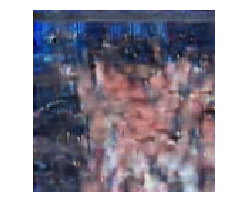

In [237]:
z = z + np.random.normal(size=(1,128), scale=1.0)
y = sess.run(decoder, feed_dict={encoder: z})
imshow([y[0]])

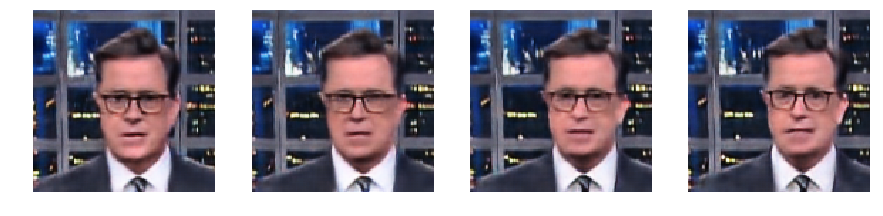

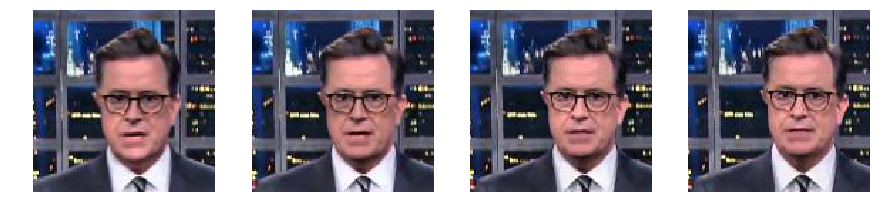

In [7]:
idx = 720
y = sess.run(decoder, feed_dict={X: training[idx:idx+4]})
y.shape
imshow(y[0:4])
imshow(training[idx:idx+4])